In [1]:
#Airline Review
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Define the dataset path in Kaggle
dataset_path = "../input/airline-reviews/BA_AirlineReviews.csv"

def load_data(path):
    try:
        df = pd.read_csv(path)
    except FileNotFoundError:
        print(f"Error: File '{path}' not found.")
    except pd.errors.EmptyDataError:
        print(f"Error: File '{path}' is empty.")
    except pd.errors.ParserError:
        print(f"Error: Unable to parse the file '{path}'. Check the file format.")
    except Exception as e:
        print(f"An unexpected error occurred: {str(e)}")
        raise

    return df


In [3]:
def explore_data(df):
    print("Descriptive Statistics:")
    print(df.describe())

    # Filter numeric columns for correlation matrix
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    numeric_df = df[numeric_columns]

    # Check for missing values in numeric columns
    missing_values = numeric_df.isnull().sum()
    print("\nMissing Values in Numeric Columns:")
    print(missing_values[missing_values > 0])

    # Plot correlation heatmap for numeric features
    plt.figure(figsize=(12, 10))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
    plt.title('Correlation Heatmap')
    plt.show()

# Uncomment the next section for exploring data
# explore_data(df)


In [4]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

def preprocess_data(df):
    # Drop rows with missing values
    df.dropna(inplace=True)

    # Convert text to lowercase
    df['ReviewBody'] = df['ReviewBody'].str.lower()

    # Remove special characters, numbers, and punctuation
    df['ReviewBody'] = df['ReviewBody'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    df['ReviewBody'] = df['ReviewBody'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))

    # Perform stemming
    ps = PorterStemmer()
    df['ReviewBody'] = df['ReviewBody'].apply(lambda x: ' '.join([ps.stem(word) for word in word_tokenize(x)]))

    # Add more advanced preprocessing steps as needed, such as:
    # - Lemmatization
    # - Handling contractions
    # - Removing HTML tags
    # - Removing or replacing URLs
    # - Spell checking and correction
    # - Handling emojis

    return df

In [5]:
def sentiment_analysis_model(X_train, y_train, X_test):
    vectorizer = TfidfVectorizer()
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)

    model = SVC(C=1.0, kernel='linear', gamma='auto')
    model.fit(X_train_vectorized, y_train)
    y_pred = model.predict(X_test_vectorized)

    return pd.Series(y_pred, index=X_test.index)

# Uncomment the next section for sentiment analysis
# X_train, X_test, y_train, y_test = train_test_split(df['ReviewBody'], df['Recommended'], test_size=0.2, random_state=42)
# y_pred_sentiment = sentiment_analysis_model(X_train, y_train, X_test)
# results_df = pd.DataFrame({'ReviewBody': X_test, 'Recommended': y_test, 'PredictedSentiment': y_pred_sentiment})


In [6]:
def service_quality_assessment(df, aspect='SeatComfort'):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Recommended', y=aspect, data=df)
    plt.title(f'Service Quality Assessment: {aspect}')
    plt.xlabel('Recommended')
    plt.ylabel(f'{aspect} Rating')
    plt.show()

# Uncomment the next section for service quality assessment
# service_quality_assessment(df, aspect='SeatComfort')
# service_quality_assessment(df, aspect='CabinStaffService')


Descriptive Statistics:
        Unnamed: 0  OverallRating  SeatComfort  CabinStaffService  \
count  3701.000000    3696.000000  3585.000000        3574.000000   
mean   1850.000000       4.734307     2.875314           3.254057   
std    1068.531001       3.175306     1.362081           1.489709   
min       0.000000       1.000000     1.000000           1.000000   
25%     925.000000       2.000000     2.000000           2.000000   
50%    1850.000000       4.000000     3.000000           3.000000   
75%    2775.000000       8.000000     4.000000           5.000000   
max    3700.000000      10.000000     5.000000           5.000000   

       GroundService  ValueForMoney  Food&Beverages  InflightEntertainment  \
count    2855.000000    3700.000000     3315.000000            2551.000000   
mean        2.784238       2.688378        2.713122               2.646021   
std         1.457058       1.471887        1.437092               1.398509   
min         1.000000       1.000000       

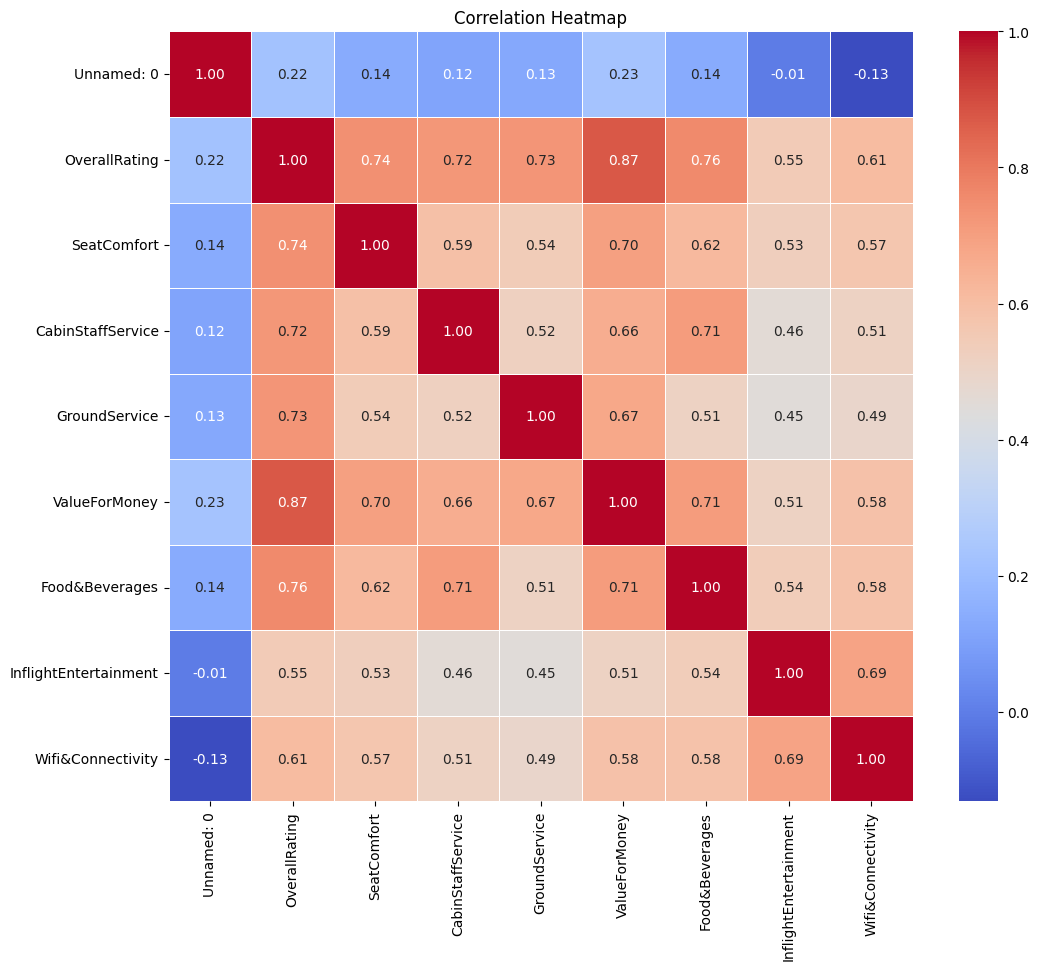

Accuracy: 0.9242

Updated Results Table:
╒══════╤════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤═════════════════════╤══════════════════════╕
│      │ ReviewBody         

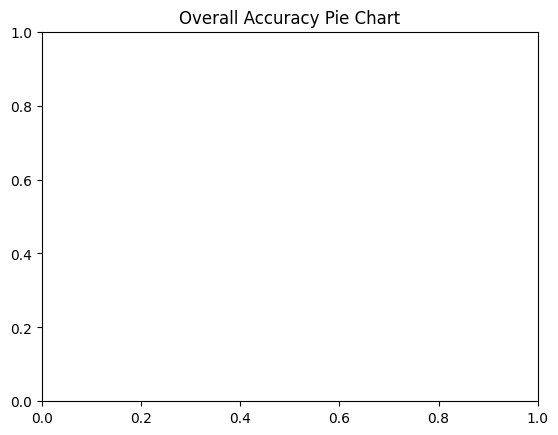

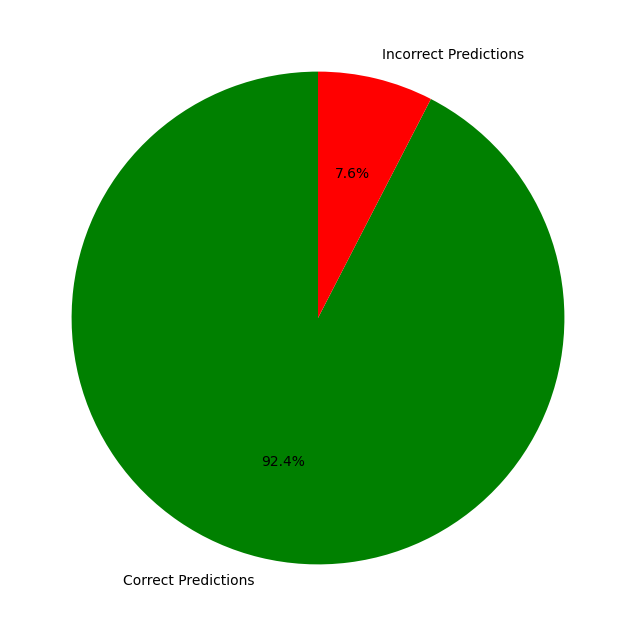

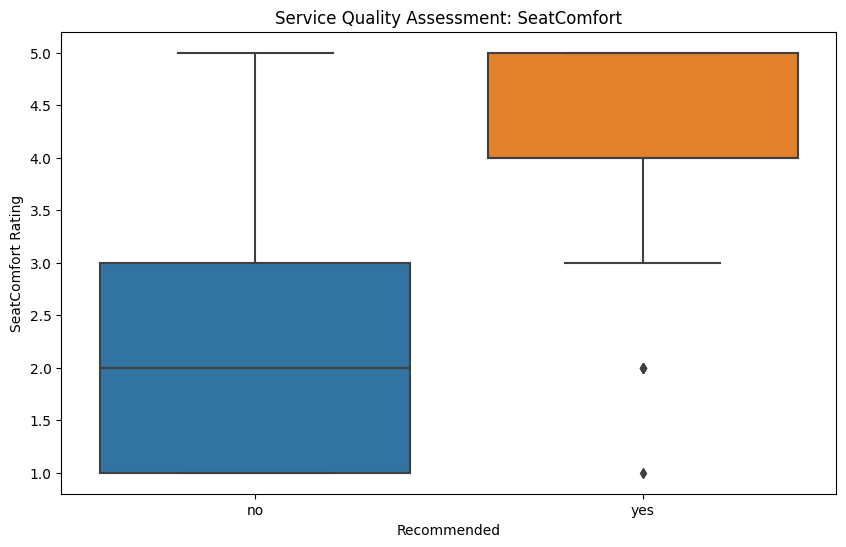

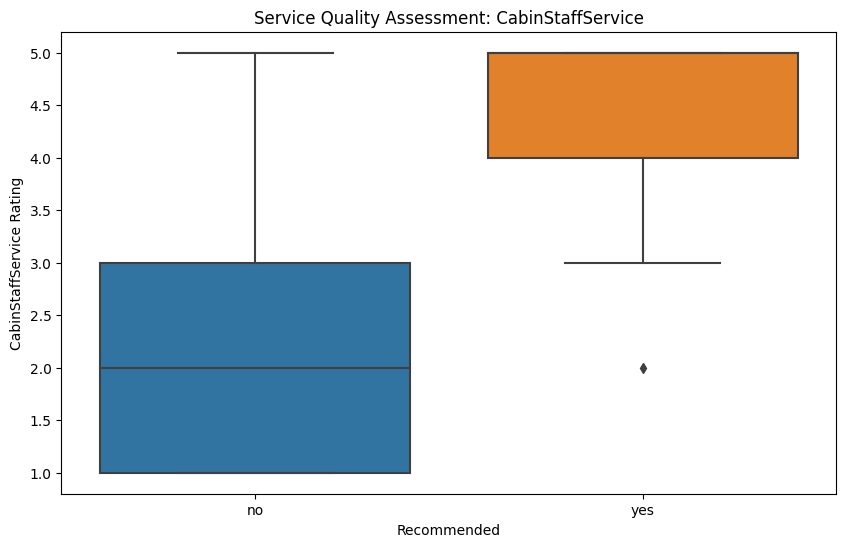

In [7]:
from tabulate import tabulate
def main():
    df = load_data(dataset_path)
    explore_data(df)
    df = preprocess_data(df)

    X_train, X_test, y_train, y_test = train_test_split(df['ReviewBody'], df['Recommended'], test_size=0.2, random_state=42)
    y_pred_sentiment = sentiment_analysis_model(X_train, y_train, X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred_sentiment)
    print(f"Accuracy: {accuracy:.4f}")

    # Create a pie chart for overall accuracy
    labels = ['Correct Predictions', 'Incorrect Predictions']
    sizes = [accuracy * len(y_test), (1 - accuracy) * len(y_test)]
    colors = ['green', 'red']
    
    # Create a results table
    results_df = pd.DataFrame({'ReviewBody': X_test, 'ActualRecommended': y_test, 'PredictedSentiment': y_pred_sentiment})

    # Append overall accuracy to the results table
    overall_accuracy_row = pd.DataFrame({'ReviewBody': ['Overall Accuracy'], 'ActualRecommended': [''], 'PredictedSentiment': [accuracy]})
    
    # Concatenate the overall accuracy row to the results_df_updated
    results_df_updated = pd.concat([results_df, overall_accuracy_row], ignore_index=True)

    # Display the updated results table
    print("\nUpdated Results Table:")
    print(tabulate(results_df.head(3), headers='keys', tablefmt='fancy_grid'))

    plt.title('Overall Accuracy Pie Chart')
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

    plt.show()

    # Visualize service quality based on various aspects
    service_quality_assessment(df, aspect='SeatComfort')
    service_quality_assessment(df, aspect='CabinStaffService')

if __name__ == "__main__":
    main()
